In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path='C:/Users/COMPUMARTS/Downloads/repo/Cafe data cleaning/clean_cafe_sales_saved.csv'
df=pd.read_csv(path)
df.tail()

,Unnamed: 0,Transaction_ID,Item,Quantity,Price_Per_Unit,Total_Spent,Payment_Method,Location
9936,9994,TXN_7851634,Smoothie,4.0,4.0,16.0,Digital Wallet,Takeaway
9937,9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway
9938,9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway
9939,9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway
9940,9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway


In [3]:
# Convert relevant columns to numeric, coercing errors to NaN
# df[['Quantity', 'Price_Per_Unit', 'Total_Spent']] = df[['Quantity', 'Price_Per_Unit', 'Total_Spent']].apply(pd.to_numeric, errors='coerce')
df['Price_Per_Unit']=df['Price_Per_Unit'].astype('int')
df['Total_Spent']=df['Total_Spent'].astype('int')
df.dtypes
# num=df.select_dtypes('int')

Unnamed: 0          int64
Transaction_ID     object
Item               object
Quantity          float64
Price_Per_Unit      int64
Total_Spent         int64
Payment_Method     object
Location           object
dtype: object

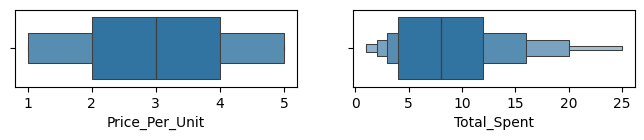

In [4]:
cols=['Price_Per_Unit','Total_Spent']
plt.figure(figsize=(8,1))
for i , col in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxenplot(df[col],orient='h')
plt.show()
#! this happens cause i have a outliers

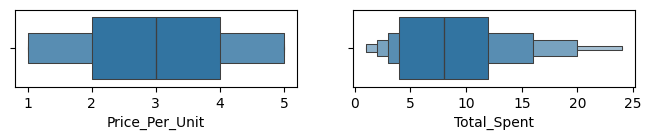

In [5]:
for i in cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    lower_outlier=df[df[i]<lower_bound][i].values
    upper_outlier=df[df[i]>upper_bound][i].values
    df[i].replace(lower_outlier,lower_bound,inplace=True)
    df[i].replace(upper_outlier,upper_bound,inplace=True)

plt.figure(figsize=(8,1))
for i , col in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxenplot(df[col],orient='h')
plt.show()
#! now its normal cause we changed outliers to upper/lower bound values

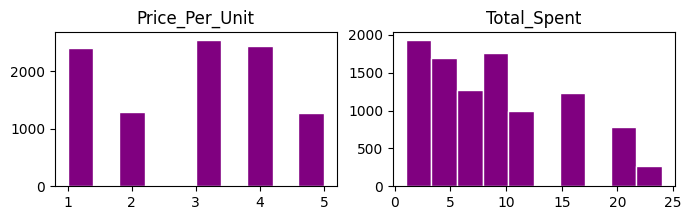

In [6]:
plt.figure(figsize=(8,2))
for i , col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],color='purple',edgecolor='white')
    plt.title(col)

In [7]:
df.dtypes

Unnamed: 0          int64
Transaction_ID     object
Item               object
Quantity          float64
Price_Per_Unit      int64
Total_Spent         int64
Payment_Method     object
Location           object
dtype: object

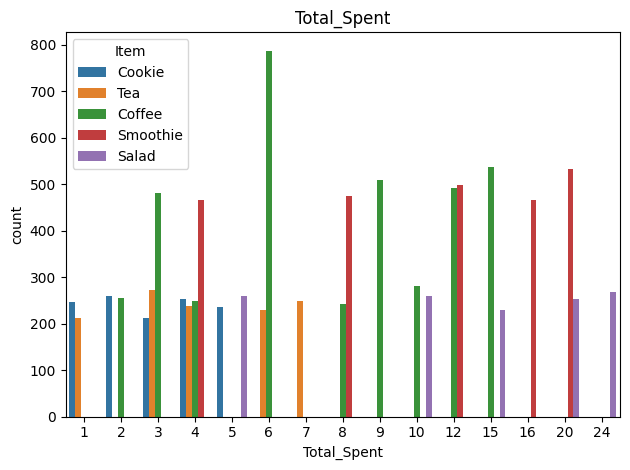

In [10]:
cat_cols=['Item','Payment_Method']
# print(cat_cols)
# for i , col in enumerate(cat_cols):
# plt.subplot(1,2,i+1)
sns.countplot(x=df[col],hue=df['Item'])
plt.title(col)
plt.tight_layout()